<a href="https://colab.research.google.com/github/r-ap/TrainingMachineLearning/blob/main/BFI_PYIM_14_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np

# Data Loading

In [4]:
data=pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Life_expectancy_dataset.csv',encoding='latin-1')

In [ ]:
data

,Rank,Country,Overall Life,Male Life,Female Life,Continent
0,1,Monaco,89.5,85.6,93.5,Europe
1,2,Japan,85.0,81.7,88.5,Asia
2,3,Singapore,85.0,82.3,87.8,Asia
3,4,Macau; China,84.5,81.6,87.6,Asia
4,5,San Marino,83.3,80.7,86.1,Europe
...,...,...,...,...,...,...
218,219,Gabon,52.1,51.6,52.5,Africa
219,220,Swaziland,51.6,52.2,51.0,Africa
220,221,Afghanistan,51.3,49.9,52.7,Asia
221,222,Guinea-Bissau,50.6,48.6,52.7,Africa


Data mengandung 223 baris dan 6 kolom

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          223 non-null    int64  
 1   Country       223 non-null    object 
 2   Overall Life  223 non-null    float64
 3   Male Life     223 non-null    float64
 4   Female Life   223 non-null    float64
 5   Continent     223 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 10.6+ KB


Tidak ada data kosong

In [ ]:
data.describe()

,Rank,Overall Life,Male Life,Female Life
count,223.000000,223.000000,223.000000,223.000000
mean,112.000000,72.487892,70.041704,75.019283
std,64.518731,8.459335,8.074942,8.986633
min,1.000000,50.200000,48.600000,51.000000
25%,56.500000,67.450000,64.500000,69.750000
50%,112.000000,74.900000,72.200000,77.900000
75%,167.500000,78.600000,75.850000,81.600000
max,223.000000,89.500000,85.600000,93.500000


Tidak ada data numerik yang anomali sehingga data sudah aman

# Data Cleaning

Tidak ada proses data cleaning karena data sudah siap diproses

# Eksplorasi Data

<AxesSubplot:xlabel='Rank', ylabel='Overall Life'>

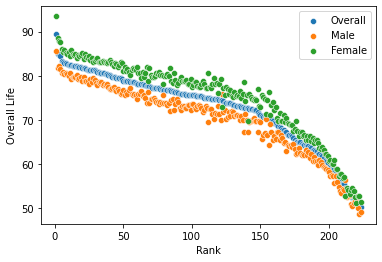

In [ ]:
sns.scatterplot(data=data,x='Rank',y='Overall Life',label='Overall')
sns.scatterplot(data=data,x='Rank',y='Male Life',label='Male')
sns.scatterplot(data=data,x='Rank',y='Female Life',label='Female')

Makin besar ranking, maka Life expectancy semakin kecil dan life expectancy overall, male, dan female rentangnya sama

<AxesSubplot:xlabel='Continent'>

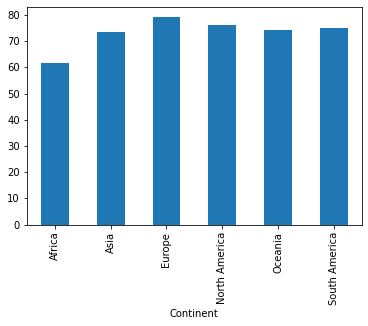

In [ ]:
data.groupby('Continent').mean()['Overall Life'].plot(kind='bar')

Overall life expentancy rata-rata tertinggi dipegang oleh negara-negara di benua Eropa sedangkan paling rendah benua Afrika. North America secara rata-rata tidak begitu jauh dengan South America padahal North America secara ekonomi setara dengan Eropa. 

<AxesSubplot:xlabel='Country'>

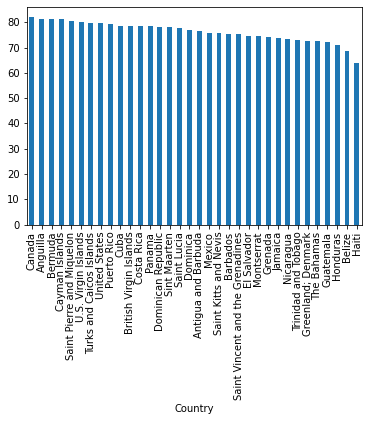

In [ ]:
data[data.Continent=='North America'].set_index(data[data.Continent=='North America']['Country'])['Overall Life'].plot(kind='bar')

Ekspektasi penulis bahwa amerika utara hanya ada kanada, amerika serikat, dan meksiko tetapi pada data, negara-negara di amerika tengah dan bermuda dimasukan ke amerika utara sehingga wajar bahwa life expectancy north america tidak jauh dari south america.

<AxesSubplot:xlabel='Continent'>

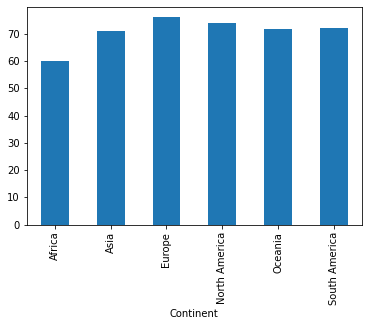

In [ ]:
data.groupby('Continent').mean()['Male Life'].plot(kind='bar')

<AxesSubplot:xlabel='Continent'>

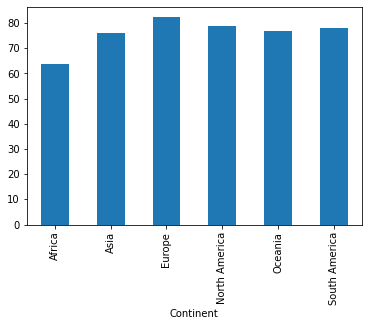

In [ ]:
data.groupby('Continent').mean()['Female Life'].plot(kind='bar')

Life expectancy antara pria dan wanita sama dengan overall

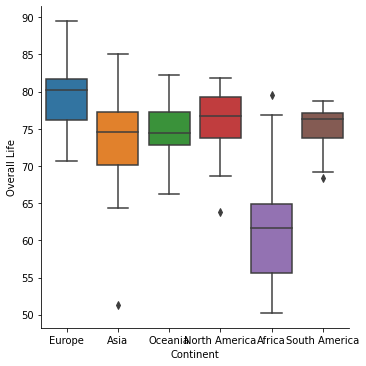

In [ ]:
sns.catplot(x="Continent", y="Overall Life", kind="box", data=data)

Overall Life Expectancy Afrika paling timpang dibanding benua lain. Ada satu negara di asia yang life expectancynya jauh di bawah negara-negara lainnya

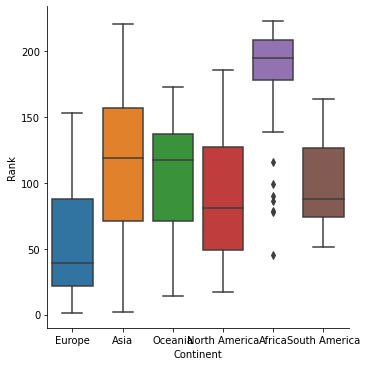

In [ ]:
sns.catplot(x="Continent", y="Rank", kind="box", data=data)

Negara-negara eropa kebanyakan memiliki ranking di bawah 100, benua Asia memiliki rentang ranking yang lebar dibandingkan benua lainnya. Benua Afrika paling besar rankingnya yaitu di atas 150 dan negara-negara dengan ranking di bawah 150 tidak mewakili keseluruhan kondisi negara-negara di Afrika

# Data Preprocessing

kolom yang dipakai untuk clustering KMeans hanya Numerik (Rank tidak dimasukkan karena dianggap sebagai data categorical tipe ordinal)

In [ ]:
scaler=MinMaxScaler()
X=scaler.fit_transform(data[['Overall Life','Male Life','Female Life']])

# Model Definition

In [ ]:
kmeans=KMeans(n_clusters=3).fit(X)

# Model Evaluation

In [ ]:
kmeans.inertia_

4.8091373801364945

In [ ]:
silhouette_score(X,kmeans.labels_)

0.5081291931978977

inersia yang diperoleh untuk jumlah kluster 3 adalah 4,8 dan silhouette score diperoleh 0,5. Butuh pengecekan lebih lanjut dengan elbow method dan silhouette score 

In [ ]:
inertias=[]
sil_scores=[]
K=[2,3,4,5,6,7,8]
for k in K:
    kmean_clust=KMeans(n_clusters=k).fit(X)
    inertias.append(kmean_clust.inertia_)
    sil_scores.append(silhouette_score(X,kmean_clust.labels_))

Text(0.5, 1.0, 'Silhouette')

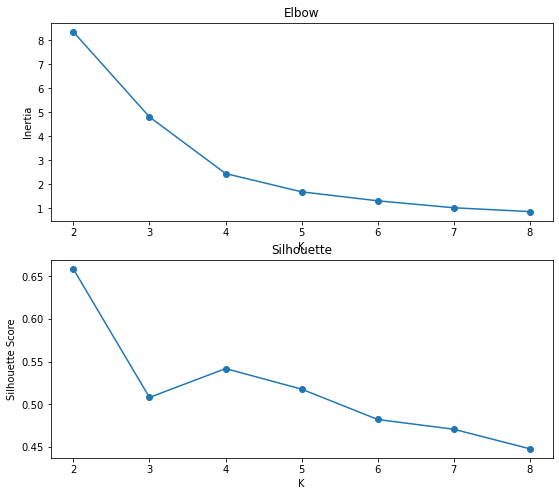

In [ ]:
fig,ax=plt.subplots(nrows=2,figsize=(9,8))
ax[0].plot(K,inertias)
ax[0].scatter(K,inertias)
ax[0].set_xlabel('K')
ax[0].set_ylabel('Inertia')
ax[0].set_title('Elbow')

ax[1].plot(K,sil_scores)
ax[1].scatter(K,sil_scores)
ax[1].set_xlabel('K')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette')

Berdasarkan evaluasi elbow method dan silhouette method, jumlah cluster yang paling tepat adalah 4 cluster.

In [ ]:
kmean_clust=KMeans(n_clusters=4).fit(X)

Akan dilakukan visualisasi 4 cluster pada plot 2 dimensi, dimana features akan direduksi dimensinya dengan PCA

In [ ]:
pca=PCA(n_components=2,whiten=True).fit(data.drop(columns=['Country','Continent','Rank']))
np.sum(pca.explained_variance_ratio_)

0.999739733947727

2 komponen sudah cukup merepresentasikan keseluruhan data

In [ ]:
X_reduced=pca.transform(data.drop(columns=['Country','Continent','Rank']))

<AxesSubplot:>

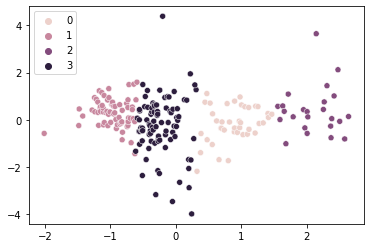

In [ ]:
sns.scatterplot(x=X_reduced[:,0],y=X_reduced[:,1],hue=kmean_clust.labels_)

4 Cluster sudah cukup terpisah satu sama lain khususnya komponen pertama

In [ ]:
data['cluster']=kmean_clust.labels_

# Model Inference

In [ ]:
sample=data.sample(10,random_state=50)

In [ ]:
X_sample=scaler.transform(sample[['Overall Life','Male Life','Female Life']])
clust=kmean_clust.predict(X_sample)

<AxesSubplot:>

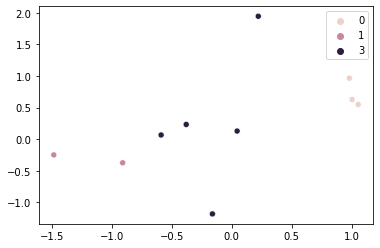

In [ ]:
sns.scatterplot(x=X_reduced[sample.index,0],y=X_reduced[sample.index,1],hue=clust)

# Pengambilan Kesimpulan

Hasil pemodelan clustering menunjukkan bahwa untuk dataset life expectancy jumlah cluster yang paling optimal sebanyak 4 berdasarkan evaluasi model menggunakan elbow method dan silhouette score. Dari visualisasi 2D cluster pada bagian model evaluation, terlihat pemisahan kelompok berdasarkan komponen pertama dan diamini pada model inference.

### Eksplorasi hasil clustering berdasarkan benua

array([<AxesSubplot:ylabel='Rank'>], dtype=object)

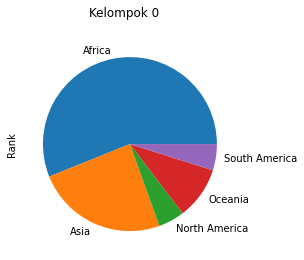

In [ ]:
data[data['cluster']==0].groupby(['Continent']).count()['Rank'].plot(kind='pie',subplots=True,title='Kelompok 0')

Mayoritas negara-negara pada kelompok 0 adalah negara-negara Afrika

array([<AxesSubplot:ylabel='Rank'>], dtype=object)

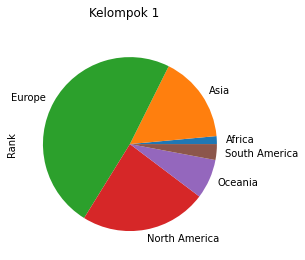

In [ ]:
data[data['cluster']==1].groupby(['Continent']).count()['Rank'].plot(kind='pie',subplots=True,title='Kelompok 1')

Mayoritas negara-negara pada kelompok 0 adalah negara-negara Eropa

array([<AxesSubplot:ylabel='Rank'>], dtype=object)

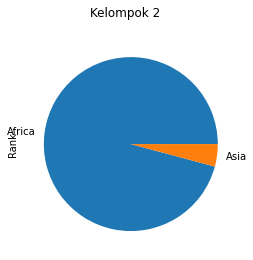

In [ ]:
data[data['cluster']==2].groupby(['Continent']).count()['Rank'].plot(kind='pie',subplots=True,title='Kelompok 2')

Kelompok 2 hanya terdiri dari negara afrika dan sebagian kecil asia. Mayoritas kelompok 2 dipegang oleh negara-negara di Afrika

array([<AxesSubplot:ylabel='Rank'>], dtype=object)

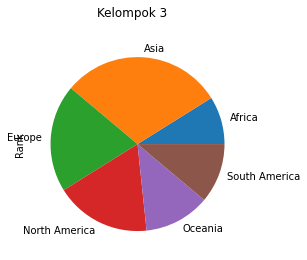

In [ ]:
data[data['cluster']==3].groupby(['Continent']).count()['Rank'].plot(kind='pie',subplots=True,title='Kelompok 3')

Kelompok 3 Dominasi dipegang oleh negara-negara di bendua Eropa dan Asia

### Eksplorasi berdasarkan rank dan Life Expectancy

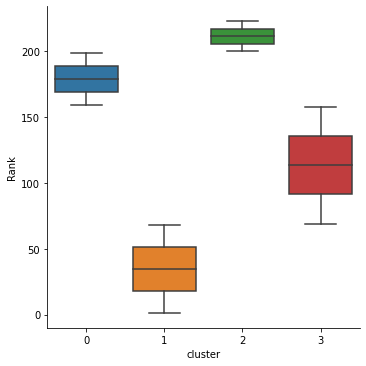

In [ ]:
sns.catplot(x="cluster", y="Rank", kind="box", data=data)

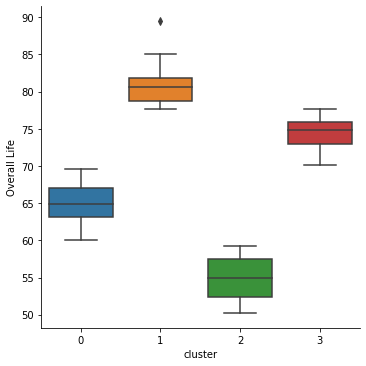

In [ ]:
sns.catplot(x="cluster", y="Overall Life", kind="box", data=data)

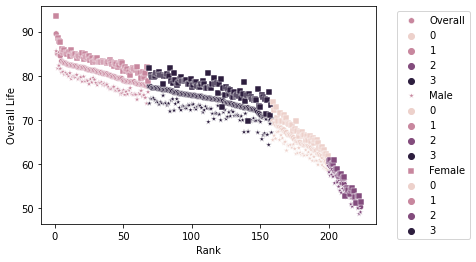

In [ ]:
sns.scatterplot(data=data,x='Rank',y='Overall Life',label='Overall',hue='cluster',marker='o')
sns.scatterplot(data=data,x='Rank',y='Male Life',label='Male',hue='cluster',marker='*')
sns.scatterplot(data=data,x='Rank',y='Female Life',label='Female',hue='cluster',marker='s')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

Dari 3 plot di atas sangat jelas pemisahan antar cluster bahwa:
- Kluster 0 merupakan negara-negara dengan rank sekitar 150-200 dimana rentang Overall life 60-70
- Kluster 1 merupakan negara-negara dengan rank sekitar 1-80 dimana rentang Overall life 75-85
- Kluster 2 merupakan negara-negara dengan rank di atas 200 dimana rentang Overall life 50-60
- Kluster 3 merupakan negara-negara dengan rank sekitar 80-160 dimana rentang Overall life 70-80

Didapati bahwa pengklusteran didasari oleh range rank.

Plot berdasarkan ranking membenarkan bahwa kelompok 0 didominasi oleh negara-negara Afrika, kelompok 1 didominasi oleh negara-negara Eropa dan Amerika Utara, kluster 2 didominasi negara-negara Afrika dan sebagian kecil Asia, serta kluster 3 merupakan kelompok menengah yang didominasi oleh negara Eropa, Asia, dan Amerika Utara.

Berdasarkan hasil analisa karakteristik cluster dan juga EDA di atas, ada 2 kesamaan informasi yang didapat bahwa:
- Negara-negara di eropa merupakan negara dengan life expectancy terbesar dimana banyak yang masuk ke kluster 1
- Negara-negara di Afrika merupakan negara-negara yang paling rendah life expectancynya. hanya sedikit yang masuk ke kluster 1 dan 3. Sebagian besar masuk ke kelompok 2